In [91]:
#This code imports the panda's library and uses it to read a CSV file. The parse_dates parameter is used to convert the "host_since" 
#column to a DateTime format.

import pandas as pd
df = pd.read_csv('D:/documents all/CodingSamurai/listings.csv', parse_dates=["host_since"])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3818 non-null   int64         
 1   listing_url                       3818 non-null   object        
 2   scrape_id                         3818 non-null   int64         
 3   last_scraped                      3818 non-null   object        
 4   name                              3818 non-null   object        
 5   summary                           3641 non-null   object        
 6   space                             3249 non-null   object        
 7   description                       3818 non-null   object        
 8   experiences_offered               3818 non-null   object        
 9   neighborhood_overview             2786 non-null   object        
 10  notes                             2212 non-null 

In [93]:
# This code creates a new DataFrame seattle_df by filtering the original DataFrame df to only include rows 
# where the city is Seattle, and selecting a subset of columns.

seattle_df=(
    df
    .query("city=='Seattle'")
    .loc[:, ["host_since", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "latitude", "longitude", "property_type", "room_type", "accommodates", "price"]]
)
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3810 entries, 0 to 3817
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   host_since                    3808 non-null   datetime64[ns]
 1   neighbourhood_cleansed        3810 non-null   object        
 2   neighbourhood_group_cleansed  3810 non-null   object        
 3   latitude                      3810 non-null   float64       
 4   longitude                     3810 non-null   float64       
 5   property_type                 3809 non-null   object        
 6   room_type                     3810 non-null   object        
 7   accommodates                  3810 non-null   int64         
 8   price                         3810 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 297.7+ KB


In [94]:
# Dropping any available duplicates.

seattle_df.drop_duplicates(inplace=True)

In [95]:
# Create a year Column out of 'host_since'.

seattle_df['year'] = seattle_df['host_since'].dt.year

In [96]:
# Create a month Column out of 'host_since'.

seattle_df['month'] = seattle_df['host_since'].dt.month

In [97]:
# from 2008 to 2016 this code checks if a year has less than 12 unique months, it prints the year 
# and the number of months available.

for year in range(2008, 2017):
    months_in_year = seattle_df[seattle_df['year'] == year]['month'].unique()
    if len(months_in_year) < 12:
        print(f"Year {year} has only {len(months_in_year)} months")

Year 2008 has only 1 months
Year 2009 has only 11 months
Year 2016 has only 1 months


In [98]:
# filtering out the 2016 data.

seattle_df = seattle_df[seattle_df['year'] != 2016]

In [99]:
# Converting the strings to float data type using the astype & ensures the 'price' column contains clean and consistent numerical data

seattle_df['price'] = seattle_df['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [100]:
# total number of missing values

seattle_df.isna().sum()

host_since                      2
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   1
room_type                       0
accommodates                    0
price                           0
year                            2
month                           2
dtype: int64

In [101]:
# Renaming two columns names.

seattle_df.rename(columns={'neighbourhood_group_cleansed': 'neighbourhood_group', 'neighbourhood_cleansed': 'neighbourhood'}, inplace=True)

In [102]:
# fills missing values with 'mode' value of its column

seattle_df['property_type'].fillna(seattle_df['property_type'].mode()[0], inplace=True)

In [103]:
# drops all rows where the value in the host_since column is missing or null

seattle_df.dropna(subset=['host_since'], inplace=True)

In [159]:
seattle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 0 to 3817
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   host_since           3803 non-null   datetime64[ns]
 1   neighbourhood        3803 non-null   object        
 2   neighbourhood_group  3803 non-null   object        
 3   latitude             3803 non-null   float64       
 4   longitude            3803 non-null   float64       
 5   property_type        3803 non-null   object        
 6   room_type            3803 non-null   object        
 7   accommodates         3803 non-null   int64         
 8   price                3803 non-null   float64       
 9   year                 3803 non-null   float64       
 10  month                3803 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 356.5+ KB


In [105]:
# Defining new DataFrame called seattle_df_neighbourhood_group. This code groups the seattle_df DataFrame by the neighbourhood_group column, 
# calculates the mean price for each group, and sorts the resulting DataFrame by the price column in ascending order.

seattle_df_neighbourhood_group = (
    seattle_df
    .groupby("neighbourhood_group")
    .agg({"price": "mean"})
    .sort_values("price")
)   

In [106]:
seattle_df_neighbourhood_group.tail()

,price
neighbourhood_group,
Cascade,140.101124
West Seattle,141.995025
Downtown,154.329545
Queen Anne,157.690476
Magnolia,177.672131


In [107]:
# Show the mean price for each accommodation type in the Magnolia neighbourhood in ascending order.

seattle_df_accommodates = (
    seattle_df
    .query("neighbourhood_group == 'Magnolia'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)   
seattle_df_accommodates.tail()

,price
accommodates,
7,229.000000
6,281.666667
8,320.000000
12,350.000000
10,354.000000


In [108]:
# a new DataFrame seattle_df_over_time for yearly trends. It aggregates the data by counting the number of listings in each 
# neighbourhood group and calculating the mean price of listings.


seattle_df_over_time = (
    seattle_df
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood_group": "count",
        "price": "mean"
        })
)
seattle_df_over_time.tail()

,neighbourhood_group,price
host_since,,
2011-12-31,398,140.510050
2012-12-31,539,124.920223
2013-12-31,774,129.736434
2014-12-31,896,127.511161
2015-12-31,979,122.059244


## Visualization

<Axes: title={'center': 'Average Listings Price by Seattle Neighbourhood Group'}, xlabel='Price per Night (USD)', ylabel='Neighbourhood Group'>

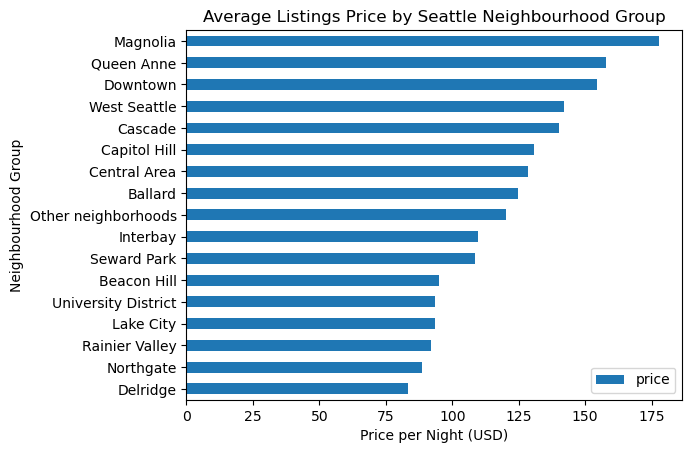

In [109]:
# This code using the seattle_df_neighbourhood_group DataFrame, displaying:
# easy identification of the most expensive and affordable areas.

(seattle_df_neighbourhood_group
 .plot
 .barh(
     title = "Average Listings Price by Seattle Neighbourhood Group",
     ylabel = "Neighbourhood Group",
     xlabel = "Price per Night (USD)"    
 )    
)

<Axes: title={'center': 'Average Listings Price by Number of Accommodation'}, xlabel='Price per Night (USD)', ylabel='Accommodation Capacity'>

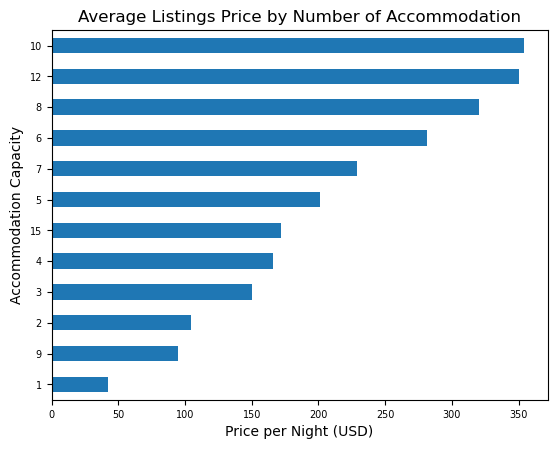

In [110]:
# This code using the seattle_df_accommodates DataFrame, displaying:
# prices vary based on the number of guests a listing can accommodate.

(seattle_df_accommodates
 .plot
 .barh(
     fontsize = 7,
     title = "Average Listings Price by Number of Accommodation",
     xlabel = "Price per Night (USD)",
     ylabel = "Accommodation Capacity",
     legend = None
 )    
)

<Axes: title={'center': 'Seattle Airbnb hosts over time'}, xlabel='host_since', ylabel='New Hosts'>

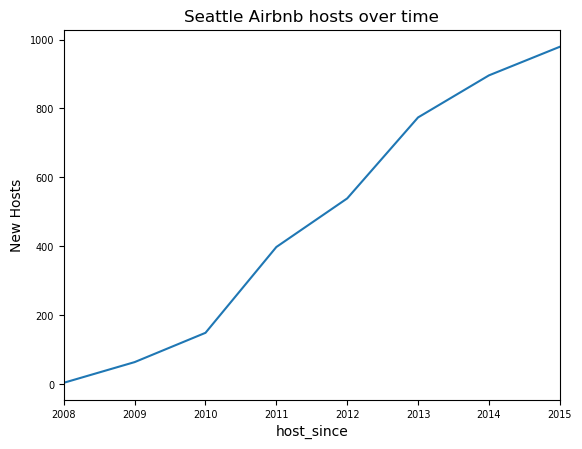

In [111]:
# line plot showing the number of new hosts in each neighbourhood group over the years.

seattle_df_over_time["neighbourhood_group"].plot(
    fontsize = 7,
    ylabel = "New Hosts",
    title = "Seattle Airbnb hosts over time"
)


<Axes: title={'center': 'Seattle Airbnb Average Price over time'}, xlabel='host_since', ylabel='Average Price (USD)'>

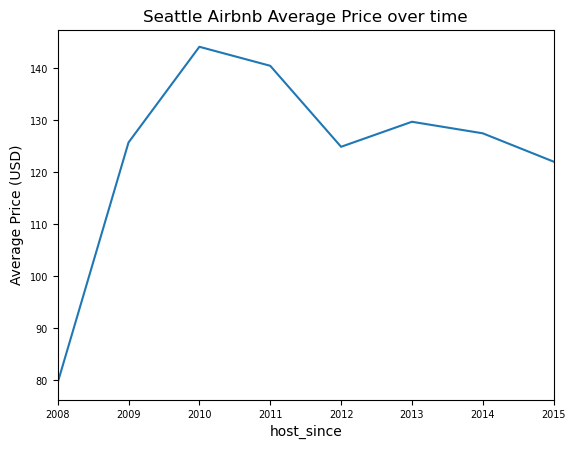

In [112]:
# line plot displaying the average price over the years.
# identify periods of growth, decline, or stability in the Seattle Airbnb market.

seattle_df_over_time["price"].plot(
    fontsize = 7,
    ylabel = "Average Price (USD)",
    title = "Seattle Airbnb Average Price over time"
)


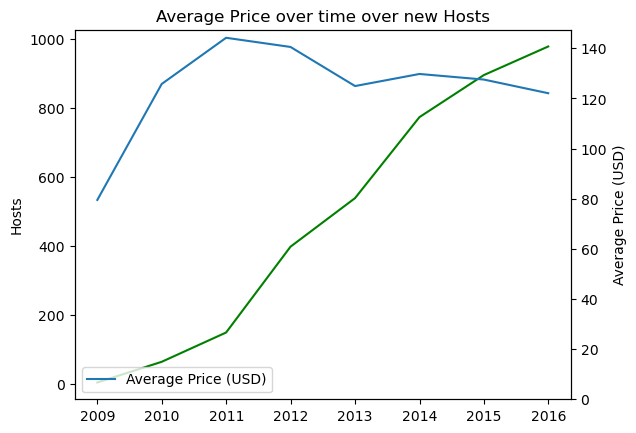

In [113]:
# This code creates a dual-axis plot using matplotlib, displaying the number of new hosts in Seattle's neighbourhood groups and 
# the average price of Airbnb listings. The plot provides a visual comparison of how these two metrics have evolved over the years, 

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(    
    seattle_df_over_time.index,
    seattle_df_over_time["neighbourhood_group"],
    label = "Hosts",
    c = "Green"
)
ax.set_ylabel("Hosts")
ax2 = ax.twinx()
ax2.plot(
    seattle_df_over_time.index,
    seattle_df_over_time["price"],
    label = "Average Price (USD)",  
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price (USD)")
ax.set_title("Average Price over time over new Hosts")
plt.legend(loc="lower left")

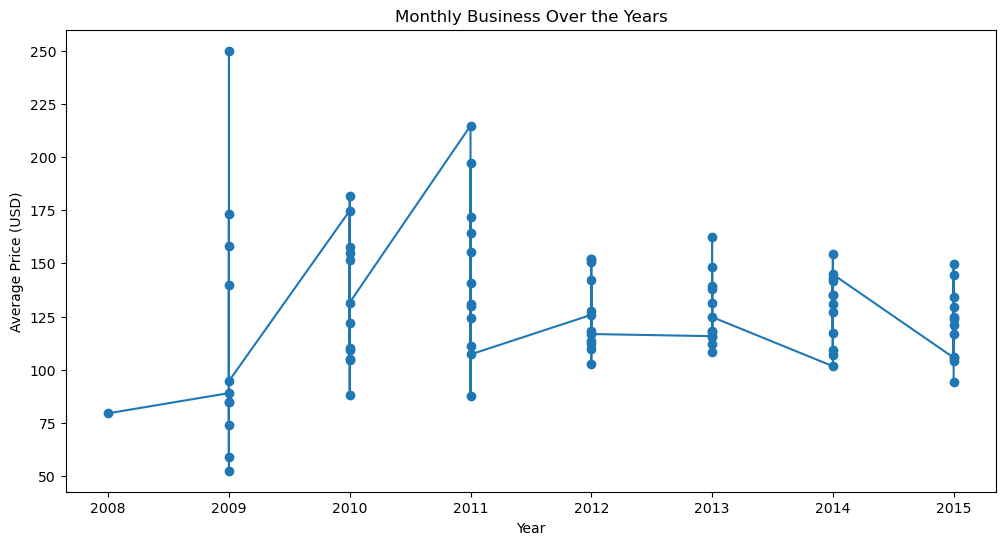

In [114]:
# displays the fluctuation in average prices across months and years.
# providing insights into seasonal and annual trends in the Seattle Airbnb market. 

monthly_data = seattle_df.groupby([seattle_df['year'], seattle_df['month']])['price'].mean()
plt.figure(figsize=(12,6))
plt.plot(monthly_data.index.get_level_values(0), monthly_data.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.title('Monthly Business Over the Years')
plt.show()

d:\Users\Win\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price Distribution')

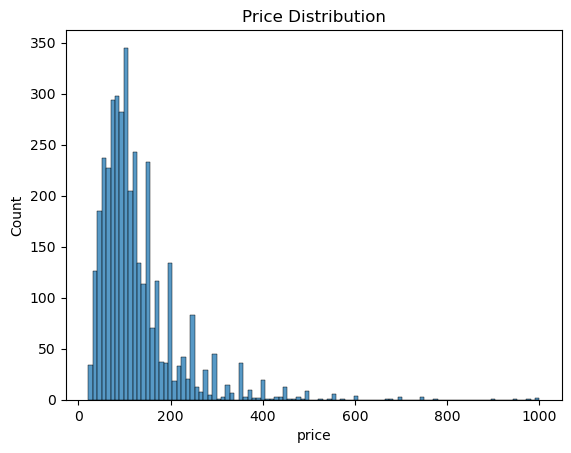

In [115]:
# frequency of listings at different price points.
# identify patterns such as skewness & outliers.

import seaborn as sns
sns.histplot(seattle_df['price'])
plt.title('Price Distribution')

Text(0.5, 1.0, 'Average Price by Room Type')

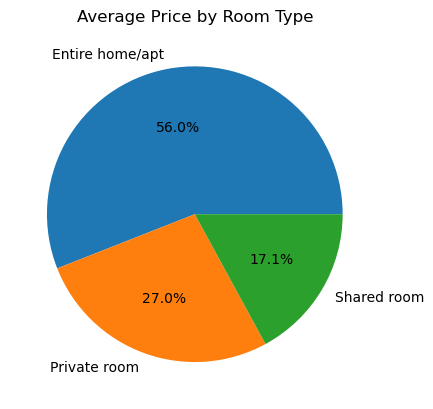

In [116]:
# pie chart to display the average price of different room types in the Seattle Airbnb market. 

room_type_avg_price = seattle_df.groupby('room_type')['price'].mean()
plt.pie(room_type_avg_price, labels=room_type_avg_price.index, autopct='%1.1f%%')
plt.title('Average Price by Room Type')

Text(0.5, 1.0, 'Distribution of Property Types')

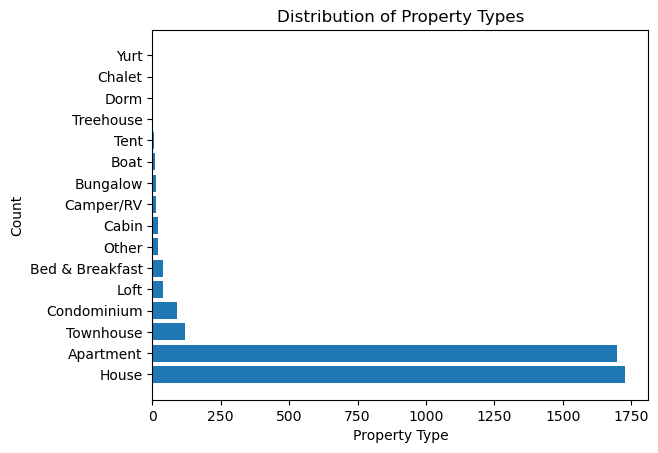

In [117]:
# frequency of different property types. 
# identify the most and least common property types.

property_type_count = seattle_df['property_type'].value_counts()
plt.barh(property_type_count.index, property_type_count.values)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Distribution of Property Types')

Text(0.5, 1.0, 'Number of Listings by Neighborhood Group')

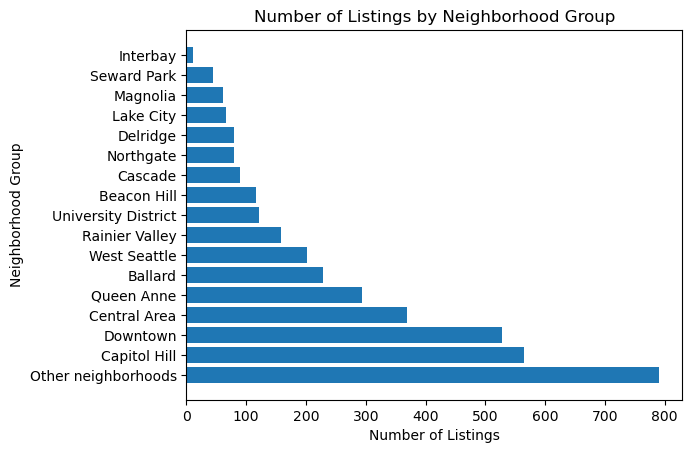

In [118]:
# number of Airbnb listings in each neighborhood group. 
# identify the most and least popular neighborhood groups.

neighborhood_group_listings = seattle_df['neighbourhood_group'].value_counts()
plt.barh(neighborhood_group_listings.index, neighborhood_group_listings.values)
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood Group')
plt.title('Number of Listings by Neighborhood Group')

In [120]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [121]:
# using Folium, displaying the locations of Airbnb listings in Seattle. The map is centered at the coordinates [47.6067, -122.3321] 
# visual representation of the geographic distribution of Airbnb listings across Seattle.

import folium
m = folium.Map(location=[47.6067, -122.3321], zoom_start=12)
for index, row in seattle_df.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']], 
                        radius=1,  # adjust the radius as needed
                        color='blue',
                        fill=True,
                        fill_color='blue',
                       ).add_to(m)
m

In [122]:
# This code calculates the correlation matrix for the numeric columns in the dataset. 
# linear relationships between variables such as price, latitude, longitude, and other numeric features. 

import numpy as np
numeric_columns = seattle_df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = seattle_df[numeric_columns].corr()
print(corr_matrix)

              latitude  longitude  accommodates     price      year     month
latitude      1.000000  -0.156922      0.000190 -0.008268 -0.006665 -0.010572
longitude    -0.156922   1.000000     -0.072275 -0.103161  0.012840  0.021570
accommodates  0.000190  -0.072275      1.000000  0.652584 -0.093189 -0.080565
price        -0.008268  -0.103161      0.652584  1.000000 -0.048839 -0.029353
year         -0.006665   0.012840     -0.093189 -0.048839  1.000000 -0.082147
month        -0.010572   0.021570     -0.080565 -0.029353 -0.082147  1.000000


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Columns in Seattle Airbnb Dataset')

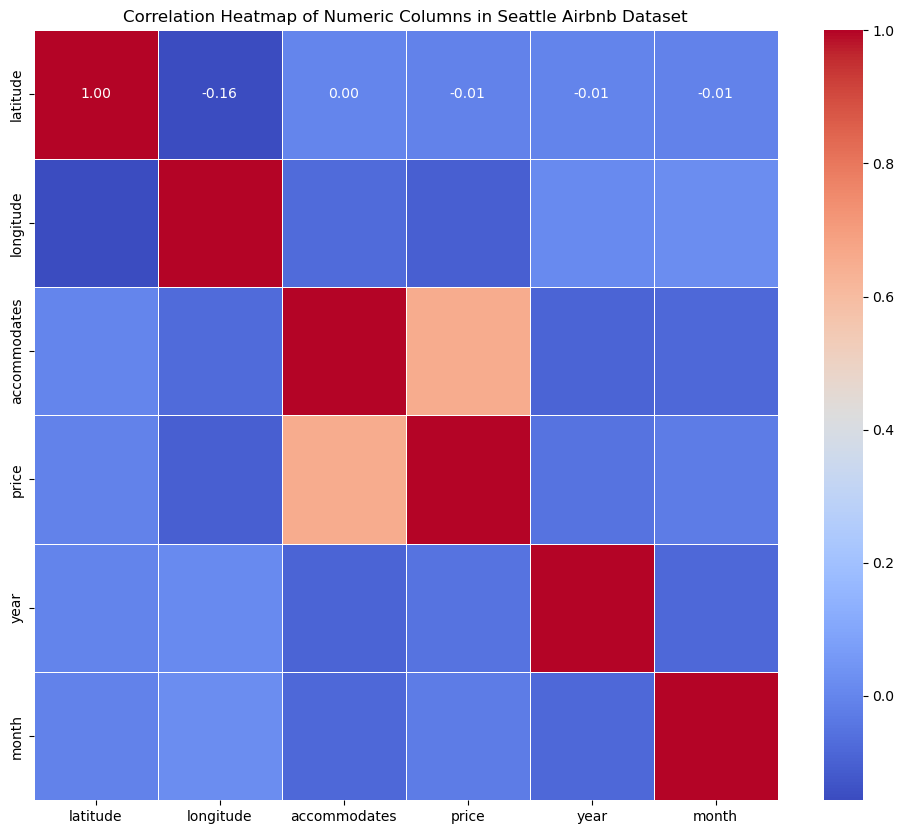

In [123]:
# seaborn's heatmap function to visualize the correlation matrix of the numeric columns in the Seattle Airbnb dataset. 

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns in Seattle Airbnb Dataset')

In [124]:
#Positive: price and accommodates, indicating that as the price increases, the number of accommodates also tends to increase.
#Weak corr: year and month, indicating no significant relationship between these columns.
#Negative: latitude and longitude, indicating that as the latitude increases, the longitude tends to decrease, and vice versa.